# This demo shows how to image search for similar goods 

The images are scraped in real time

This demo is setup using python3

Follow up more information on product webpage: https://help.aliyun.com/document_detail/113827.html

## flow:
1. imagesearch_product to get product category (my_image_search with instanceName_Product)
2. imagesearch_general to upload images with detected category
3. imagesearch_general to find similar images (my_image_search with instanceName_General)

In [1]:
#setup envionrmnet for python depedency if necessary
! pip install scrapy
! pip install aliyun-python-sdk-imagesearch #--upgrade 
! pip install pillow #--upgrade 

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


# Download samples images from AliExpress

In [2]:
#import downloader_aliexpress
#limit_for_image_download = 10
#downloader_aliexpress.run_scraper_ae(limit_for_image_download)
! python3 downloader_aliexpress.py --limit 20

== set limit: 20
2019-07-22 16:57:18 [scrapy.utils.log] INFO: Scrapy 1.7.1 started (bot: scrapybot)
2019-07-22 16:57:18 [scrapy.utils.log] INFO: Versions: lxml 4.3.4.0, libxml2 2.9.9, cssselect 1.0.3, parsel 1.5.1, w3lib 1.20.0, Twisted 19.2.1, Python 3.7.3 (default, Mar 27 2019, 09:23:39) - [Clang 10.0.0 (clang-1000.11.45.5)], pyOpenSSL 19.0.0 (OpenSSL 1.1.1c  28 May 2019), cryptography 2.7, Platform Darwin-18.6.0-x86_64-i386-64bit
2019-07-22 16:57:18 [scrapy.crawler] INFO: Overridden settings: {'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2019-07-22 16:57:18 [scrapy.extensions.telnet] INFO: Telnet Password: 51a61325eb0d6689
2019-07-22 16:57:18 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2019-07-22 16:57:18 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.

2019-07-22 16:57:23 [urllib3.connectionpool] DEBUG: http://ae01.alicdn.com:80 "GET /kf/HTB1oxDQcBWD3KVjSZKPq6yp7FXaa/500-1000ml-Double-Wall-Insulated-Vacuum-Flask-Stainless-Steel-Water-Bottle-Cola-Water-Beer-Thermos-for.jpg_220x220xz.jpg HTTP/1.1" 200 31694
8e9f095fb670db2b9ba68d0807ef22afb2cfd2f2f13632f4d6624519
-------
7 20
http://ae01.alicdn.com/kf/HTB1mS08QFzqK1RjSZFvq6AB7VXaf/Unbreakable-Plastic-Outdoor-My-Bicycle-Sports-Water-Bottles-550ml-Portable-Leak-Proof-Yoga-Gym-Fitness-Drinking.jpg_220x220xz.jpg
http://www.aliexpress.com/item/Unbreakable-Plastic-Outdoor-My-Bicycle-Sports-Water-Bottles-550ml-Portable-Leak-Proof-Yoga-Gym-Fitness-Drinking/32895172704.html?ws_ab_test=searchweb0_0,searchweb201602_3_10065_10068_319_10546_10059_10884_317_10548_10887_10696_321_322_10084_453_10083_454_10103_10618_10307_537_536,searchweb201603_60,ppcSwitch_0&algo_expid=0b677a61-1096-49a1-a2cb-2b800aa68659-14&algo_pvid=0b677a61-1096-49a1-a2cb-2b800aa68659
100003293
US $0.41 - 2.79
2019-07-22 16:57:23

2019-07-22 16:57:24 [urllib3.connectionpool] DEBUG: http://ae01.alicdn.com:80 "GET /kf/HTB1ImtdJ3HqK1RjSZJnq6zNLpXa9/Kitchen-Leakproof-Creative-Transparent-Milk-Water-Bottle-Drinkware-Outdoor-Climbing-Tour-Camping-Children-Men-Milk-Water.jpg_220x220xz.jpg HTTP/1.1" 200 36543
4f79dd3292ddb1c928320633e2d1b3481f7702b0e2339c67c2ee650e
-------
15 20
http://ae01.alicdn.com/kf/HTB1rpNtV4TpK1RjSZFMq6zG_VXab/Flamingo-Floral-Water-Bottle-BPA-free-Stainless-Steel-Beer-Tea-Coffee-Thermos-Bottle-Travel-Sport-Gym.jpg_220x220xz.jpg
http://www.aliexpress.com/item/Flamingo-Floral-Water-Bottle-BPA-free-Stainless-Steel-Beer-Tea-Coffee-Thermos-Bottle-Travel-Sport-Gym/33017550442.html?ws_ab_test=searchweb0_0,searchweb201602_3_10065_10068_319_10546_10059_10884_317_10548_10887_10696_321_322_10084_453_10083_454_10103_10618_10307_537_536,searchweb201603_60,ppcSwitch_0&algo_expid=0b677a61-1096-49a1-a2cb-2b800aa68659-22&algo_pvid=0b677a61-1096-49a1-a2cb-2b800aa68659
100003293
US $12.73
2019-07-22 16:57:24 [urlli

In [3]:
# count for how many images been downloaded
! ls -lhs ./image_auto_scraped/img/

total 1032
40 -rw-r--r--  1 jhs  staff    19K 22 Jul 16:57 img_058801633d05a5040c7844a0e995489f401efac3b3e2f7609eae3c55.png
72 -rw-r--r--  1 jhs  staff    32K 22 Jul 16:57 img_085e33502ea30eda8489585607ac037062094cc2a57703e9ab0b19b8.png
72 -rw-r--r--  1 jhs  staff    33K 22 Jul 16:57 img_22d4e720b8adfe0807d15a0ccd6e837e51f536b9b37cbd6123f7a162.png
40 -rw-r--r--  1 jhs  staff    17K 22 Jul 16:57 img_3d8bd4deda2ec9f149616cd1cebea124a6e11d4c065f1e3a547f1ca3.png
32 -rw-r--r--  1 jhs  staff    13K 22 Jul 16:57 img_4c591a978c4e5222c28828b98b33f4a537204041d490c29c0a9a7ba3.png
72 -rw-r--r--  1 jhs  staff    36K 22 Jul 16:57 img_4f79dd3292ddb1c928320633e2d1b3481f7702b0e2339c67c2ee650e.png
40 -rw-r--r--  1 jhs  staff    18K 22 Jul 16:57 img_7c69a075a575c1e90f03f1f7e8e6837ca65a5e7679a1ebe6782c8ada.png
40 -rw-r--r--  1 jhs  staff    18K 22 Jul 16:57 img_7e2c4e002e7014658eb0947db40d4e224d03a9d5e76e579ce5d16218.png
56 -rw-r--r--  1 jhs  staff    26K 22 Jul 16:57 img_8394051a221dd1a17af148555438f7f02

# Get access credential from environemnt setting

In [4]:
import os
accessKeyId = os.environ.get('accessKeyId', 'not_set')
accessKeySecret = os.environ.get('accessKeySecret', 'not_set')
instanceName_Product = os.environ.get('instanceName_Product', 'not_set')
instanceName_General = os.environ.get('instanceName_General', 'not_set')

print(instanceName_Product, instanceName_General)

jhsimagesearchproduct1 jhsimagesearchgeneral1


In [5]:
# setup image search connection
product = "ImageSearch"
region = 'cn-shanghai' # , ap-southeast-1(sg)

domain = 'imagesearch.cn-shanghai.aliyuncs.com' # 
endpoint = 'imagesearch.cn-shanghai.aliyuncs.com' # 

image_folder = './image_auto_scraped/img/' 

from aliyunsdkcore.profile import region_provider
from aliyunsdkcore.client import AcsClient
region_provider.add_endpoint(product, region, domain)
client  = AcsClient(accessKeyId, accessKeySecret, region)
requestClient = client

# Load supporting function

In [6]:
%load_ext autoreload
%autoreload 2
from myutil import *

# Demo for single image upload and detect object category

image path: img_94df64d931a3b78f5a409e01b1e9a7c8353f215222b55beccb3f2c46.png /Users/jhs/070_code/AlibabaCloud_ImageSearch_Demo_py2/image_auto_scraped/img/img_94df64d931a3b78f5a409e01b1e9a7c8353f215222b55beccb3f2c46.png


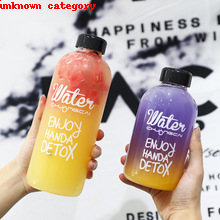

In [7]:
image_name = os.listdir(image_folder)[0]
image_path = os.path.abspath(image_folder+'/'+image_name)

print("image path:", image_name, image_path)
img1 = my_image_preview(image_path, '0,0,0,0', 'unknown category')
img1

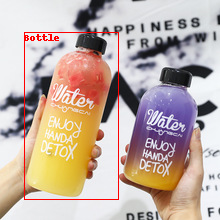

/Users/jhs/070_code/AlibabaCloud_ImageSearch_Demo_py2/image_auto_scraped/img/img_94df64d931a3b78f5a409e01b1e9a7c8353f215222b55beccb3f2c46.png


In [8]:
# test to upload a single image
image_name = os.listdir(image_folder)[0]
image_path = os.path.abspath(image_folder+'/'+image_name)
result = my_image_search_for_category_detection_display(requestClient, instanceName_Product, image_path)
print(image_path)

# Upload all images into imagesearch_General with detected category

In [9]:
images = list_images(image_folder)
#pprint(images)

for image_path in images:
    image_name = images[image_path]
    #image_path = './image/1.jpg'
    
    r = my_image_search_for_category_detection(requestClient, instanceName_Product, image_path)
    cate_id = r['cate_id']
    cate_desc = r['cate_desc']
    obj_region = r['obj_region']
    r = my_image_upload_for_similarity_search(requestClient, endpoint, instanceName_General, image_name, image_name, image_path, cate_id, cate_desc, obj_region)
    
    time.sleep(2)

======= 8 img_94df64d931a3b78f5a409e01b1e9a7c8353f215222b55beccb3f2c46.png
======= 8 img_a2465ae192cee0eaf5d99b5b7248ce433d51f91caeb73cb8e1c3272f.png
======= 8 img_22d4e720b8adfe0807d15a0ccd6e837e51f536b9b37cbd6123f7a162.png
======= 8 img_085e33502ea30eda8489585607ac037062094cc2a57703e9ab0b19b8.png
======= 8 img_d27c86a06fc89873775ef7114c3a26c41c5e6c39dc58903e69b62684.png
======= 88888888 img_c4c9f4220c99e5d59304cd32950f415ae12f51c1cf53fabadc39d8ca.png
======= 8 img_f5384cd40192eb78bde09249947cd04eb2e8329a0e47f6140e1fc311.png
======= 8 img_3d8bd4deda2ec9f149616cd1cebea124a6e11d4c065f1e3a547f1ca3.png
======= 8 img_7e2c4e002e7014658eb0947db40d4e224d03a9d5e76e579ce5d16218.png
======= 8 img_8394051a221dd1a17af148555438f7f021be38ae414a42c987f915b2.png
======= 8 img_058801633d05a5040c7844a0e995489f401efac3b3e2f7609eae3c55.png
======= 8 img_b23934b6da76363c7bc5fe71f9b00845a27a12c1bcd605b95085b0aa.png
======= 8 img_aaf9a8988ff668c8fe263dea824bce3dc1d20ae1e5eb452444fff94e.png
======= 8 img_fe87

# Search similar images

In [10]:
#result = my_image_search_for_similarity(requestClient, instanceName_General, './image/1.jpg')


./image_auto_scraped/img/img_94df64d931a3b78f5a409e01b1e9a7c8353f215222b55beccb3f2c46.png
similar score:  4.08815574645996;178 similar image:  ./image_auto_scraped/img/img_085e33502ea30eda8489585607ac037062094cc2a57703e9ab0b19b8.png


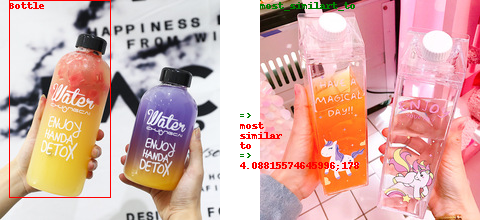

./image_auto_scraped/img/img_a2465ae192cee0eaf5d99b5b7248ce433d51f91caeb73cb8e1c3272f.png
similar score:  3.8325731754303;173 similar image:  ./image_auto_scraped/img/img_94df64d931a3b78f5a409e01b1e9a7c8353f215222b55beccb3f2c46.png


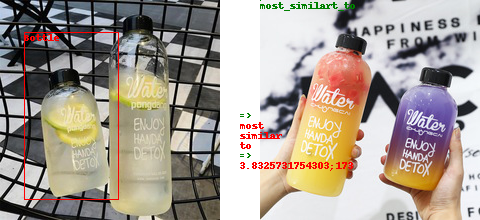

./image_auto_scraped/img/img_22d4e720b8adfe0807d15a0ccd6e837e51f536b9b37cbd6123f7a162.png
similar score:  3.26042580604553;233 similar image:  ./image_auto_scraped/img/img_8394051a221dd1a17af148555438f7f021be38ae414a42c987f915b2.png


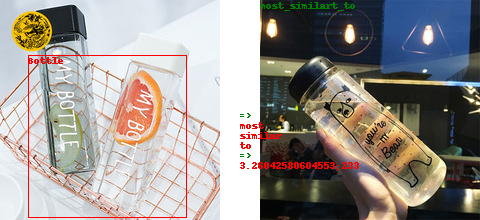

./image_auto_scraped/img/img_085e33502ea30eda8489585607ac037062094cc2a57703e9ab0b19b8.png
similar score:  4.08815574645996;178 similar image:  ./image_auto_scraped/img/img_94df64d931a3b78f5a409e01b1e9a7c8353f215222b55beccb3f2c46.png


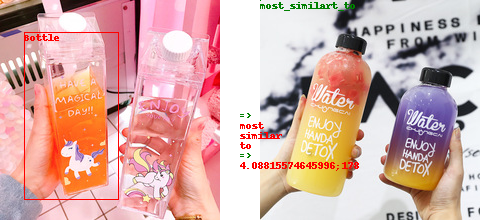

./image_auto_scraped/img/img_d27c86a06fc89873775ef7114c3a26c41c5e6c39dc58903e69b62684.png
similar score:  8.73395729064941;142 similar image:  ./image_auto_scraped/img/img_afa16a1d4ed8c4eff5ab2652e358573ab75bab7619c933c4c6482334.png


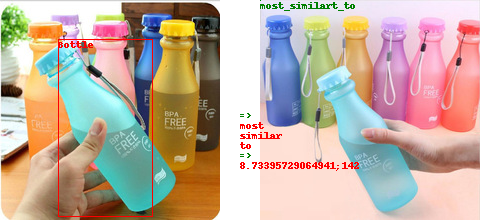

./image_auto_scraped/img/img_c4c9f4220c99e5d59304cd32950f415ae12f51c1cf53fabadc39d8ca.png
similar score:  3.93265581130981;188 similar image:  ./image_auto_scraped/img/img_b23934b6da76363c7bc5fe71f9b00845a27a12c1bcd605b95085b0aa.png


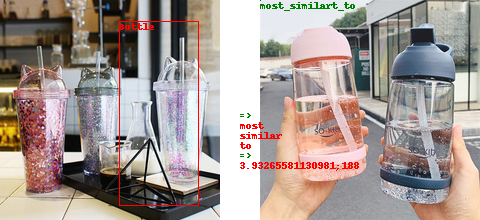

./image_auto_scraped/img/img_f5384cd40192eb78bde09249947cd04eb2e8329a0e47f6140e1fc311.png
similar score:  3.77366018295288;222 similar image:  ./image_for_test/HTB1QAdxdkxz61VjSZFrq6xeLFXaz.jpg_350x350.jpg


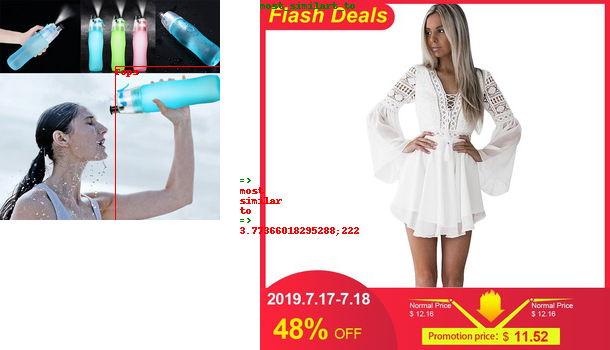

./image_auto_scraped/img/img_3d8bd4deda2ec9f149616cd1cebea124a6e11d4c065f1e3a547f1ca3.png
similar score:  3.58087992668152;206 similar image:  ./image_auto_scraped/img/img_ef1a469333d93b972f3a5fec1a935027ea1bb2be2ab618effe4a03ab.png


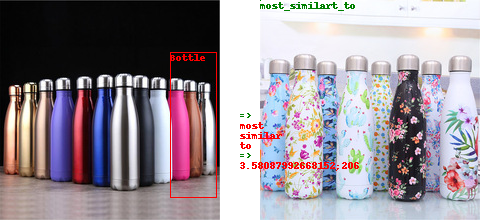

./image_auto_scraped/img/img_7e2c4e002e7014658eb0947db40d4e224d03a9d5e76e579ce5d16218.png
similar score:  3.71105790138245;226 similar image:  ./image_auto_scraped/img/img_d27c86a06fc89873775ef7114c3a26c41c5e6c39dc58903e69b62684.png


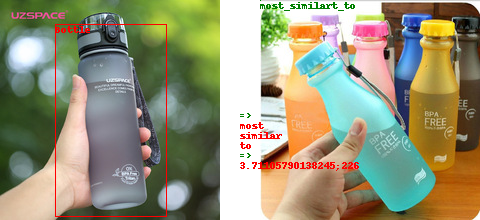

./image_auto_scraped/img/img_8394051a221dd1a17af148555438f7f021be38ae414a42c987f915b2.png
similar score:  3.31109356880188;201 similar image:  ./image_for_test/HTB19vore2WG3KVjSZPcq6zkbXXaZ.jpg_350x350.jpg


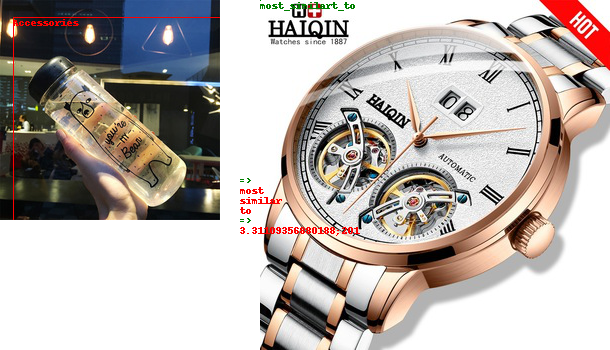

./image_auto_scraped/img/img_058801633d05a5040c7844a0e995489f401efac3b3e2f7609eae3c55.png
similar score:  3.03684735298157;231 similar image:  ./image_auto_scraped/img/img_94df64d931a3b78f5a409e01b1e9a7c8353f215222b55beccb3f2c46.png


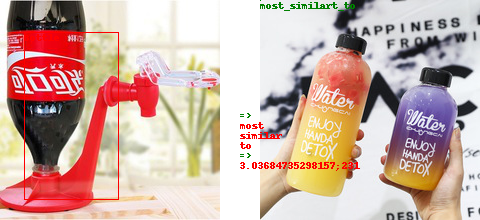

./image_auto_scraped/img/img_b23934b6da76363c7bc5fe71f9b00845a27a12c1bcd605b95085b0aa.png
similar score:  5.29288244247437;193 similar image:  ./image_auto_scraped/img/img_fe876e8902b52cce62d6a8c2987d48a24df4f76d6455c2d82eaf58cb.png


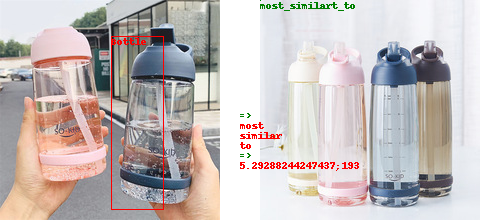

./image_auto_scraped/img/img_aaf9a8988ff668c8fe263dea824bce3dc1d20ae1e5eb452444fff94e.png
similar score:  4.06098127365112;195 similar image:  ./image_auto_scraped/img/img_085e33502ea30eda8489585607ac037062094cc2a57703e9ab0b19b8.png


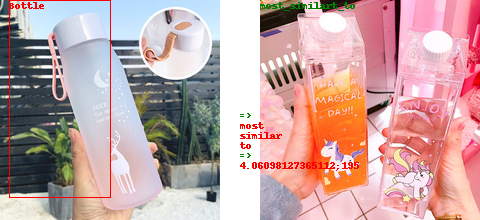

./image_auto_scraped/img/img_fe876e8902b52cce62d6a8c2987d48a24df4f76d6455c2d82eaf58cb.png
similar score:  5.29288244247437;193 similar image:  ./image_auto_scraped/img/img_b23934b6da76363c7bc5fe71f9b00845a27a12c1bcd605b95085b0aa.png


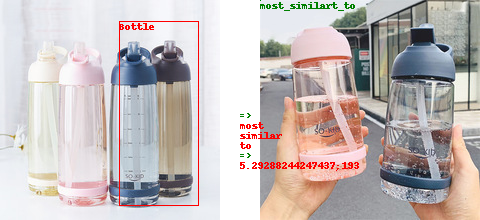

./image_auto_scraped/img/img_8e9f095fb670db2b9ba68d0807ef22afb2cfd2f2f13632f4d6624519.png
similar score:  3.28492856025696;206 similar image:  ./image_auto_scraped/img/img_a2465ae192cee0eaf5d99b5b7248ce433d51f91caeb73cb8e1c3272f.png


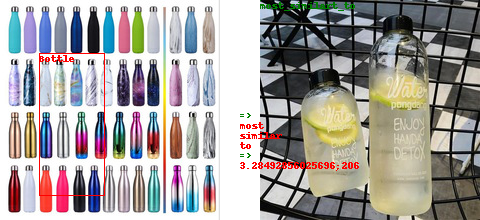

./image_auto_scraped/img/img_afa16a1d4ed8c4eff5ab2652e358573ab75bab7619c933c4c6482334.png
similar score:  8.73395729064941;142 similar image:  ./image_auto_scraped/img/img_d27c86a06fc89873775ef7114c3a26c41c5e6c39dc58903e69b62684.png


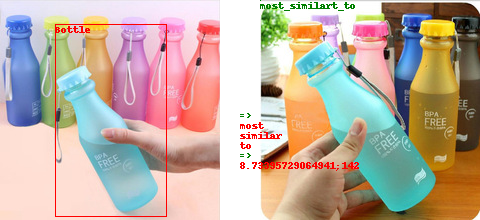

./image_auto_scraped/img/img_4f79dd3292ddb1c928320633e2d1b3481f7702b0e2339c67c2ee650e.png
similar score:  3.33533215522766;202 similar image:  ./image_auto_scraped/img/img_c4c9f4220c99e5d59304cd32950f415ae12f51c1cf53fabadc39d8ca.png


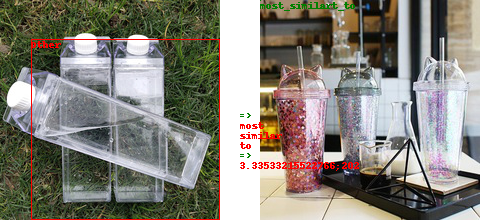

./image_auto_scraped/img/img_4c591a978c4e5222c28828b98b33f4a537204041d490c29c0a9a7ba3.png
similar score:  4.01178979873657;214 similar image:  ./image_auto_scraped/img/img_d27c86a06fc89873775ef7114c3a26c41c5e6c39dc58903e69b62684.png


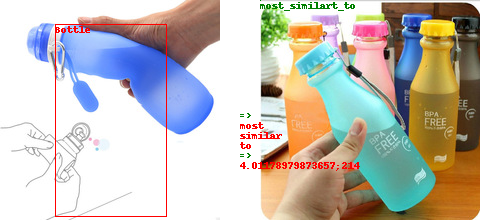

./image_auto_scraped/img/img_ef1a469333d93b972f3a5fec1a935027ea1bb2be2ab618effe4a03ab.png
similar score:  3.58087992668152;206 similar image:  ./image_auto_scraped/img/img_3d8bd4deda2ec9f149616cd1cebea124a6e11d4c065f1e3a547f1ca3.png


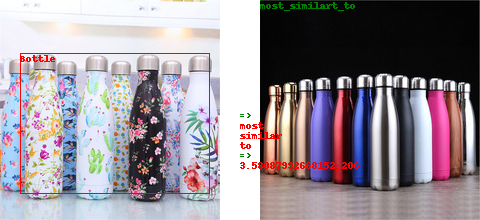

./image_auto_scraped/img/img_7c69a075a575c1e90f03f1f7e8e6837ca65a5e7679a1ebe6782c8ada.png
similar score:  3.59757304191589;211 similar image:  ./image_auto_scraped/img/img_fe876e8902b52cce62d6a8c2987d48a24df4f76d6455c2d82eaf58cb.png


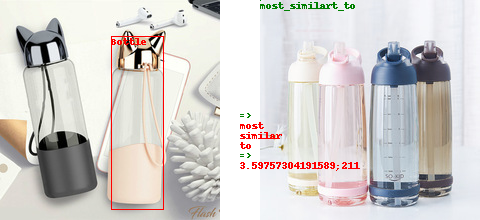

In [12]:
images = list_images(image_folder)
#pprint(images)

for image_path in images:
    image_name = images[image_path]
    r = my_image_search_for_similarity(requestClient, instanceName_General, image_path)   
    time.sleep(2)

# Delete all images being uploaded

In [13]:
images = list_images(image_folder)
#pprint(images)

for image_path in images:
    image_name = images[image_path]
    request = DeleteImageRequest.DeleteImageRequest()
    request.set_endpoint(endpoint)
    request.set_InstanceName(instanceName_Product)
    request.set_ProductId(image_name)
    response = client.do_action_with_exception(request)
    print(image_name)
    print(json.loads(response))
    time.sleep(2)

img_94df64d931a3b78f5a409e01b1e9a7c8353f215222b55beccb3f2c46.png
{'Message': 'success', 'RequestId': '3D9FDAF1-2FB6-4062-9628-8FF9DFB74BD4', 'Success': True, 'Code': 0}
img_a2465ae192cee0eaf5d99b5b7248ce433d51f91caeb73cb8e1c3272f.png
{'Message': 'success', 'RequestId': 'E036A043-7C6B-46EC-B887-7CCB8CD2C397', 'Success': True, 'Code': 0}
img_22d4e720b8adfe0807d15a0ccd6e837e51f536b9b37cbd6123f7a162.png
{'Message': 'success', 'RequestId': 'AA54AFBA-BD06-4FE7-BEC3-F72702078203', 'Success': True, 'Code': 0}
img_085e33502ea30eda8489585607ac037062094cc2a57703e9ab0b19b8.png
{'Message': 'success', 'RequestId': 'A51E71C7-7EFB-470F-AA55-624E068293E4', 'Success': True, 'Code': 0}
img_d27c86a06fc89873775ef7114c3a26c41c5e6c39dc58903e69b62684.png
{'Message': 'success', 'RequestId': '52A530D2-761F-4730-B4C0-C8C890F6D783', 'Success': True, 'Code': 0}
img_c4c9f4220c99e5d59304cd32950f415ae12f51c1cf53fabadc39d8ca.png
{'Message': 'success', 'RequestId': '0CD03D0B-2D9C-4CE6-AAF5-D32F608C9892', 'Success': Tru